<a href="https://colab.research.google.com/github/JamesLeeeeeee/machineLearning_practice/blob/master/20211108_%EC%9D%B4%EC%9E%AC%EA%B4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
wine= pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
data=wine[['alcohol','sugar','pH']].to_numpy()
target=wine['class'].to_numpy()

In [6]:
target

array([0., 0., 0., ..., 1., 1., 1.])

In [7]:
data[:10]

array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       [ 9.8 ,  1.9 ,  3.16],
       [ 9.4 ,  1.9 ,  3.51],
       [ 9.4 ,  1.8 ,  3.51],
       [ 9.4 ,  1.6 ,  3.3 ],
       [10.  ,  1.2 ,  3.39],
       [ 9.5 ,  2.  ,  3.36],
       [10.5 ,  6.1 ,  3.35]])

In [8]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target= train_test_split(
    data, target, test_size=0.2, random_state=42
)

In [9]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [10]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [11]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [12]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [14]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


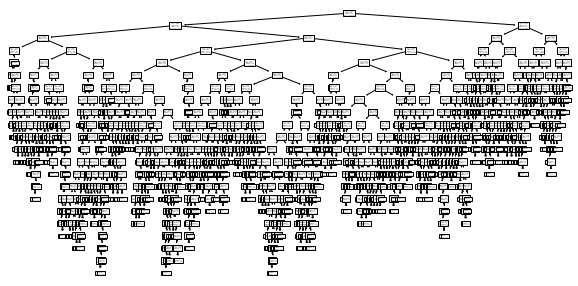

In [15]:
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
plot_tree(dt)
plt.show()

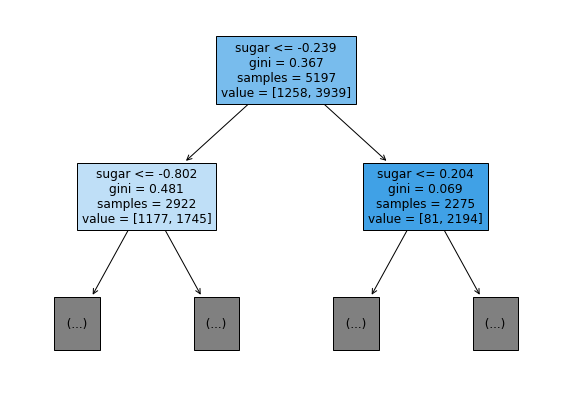

In [24]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled= True, feature_names=['alcohol', 'sugar','pH'])
plt.show()

In [25]:
dt= DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


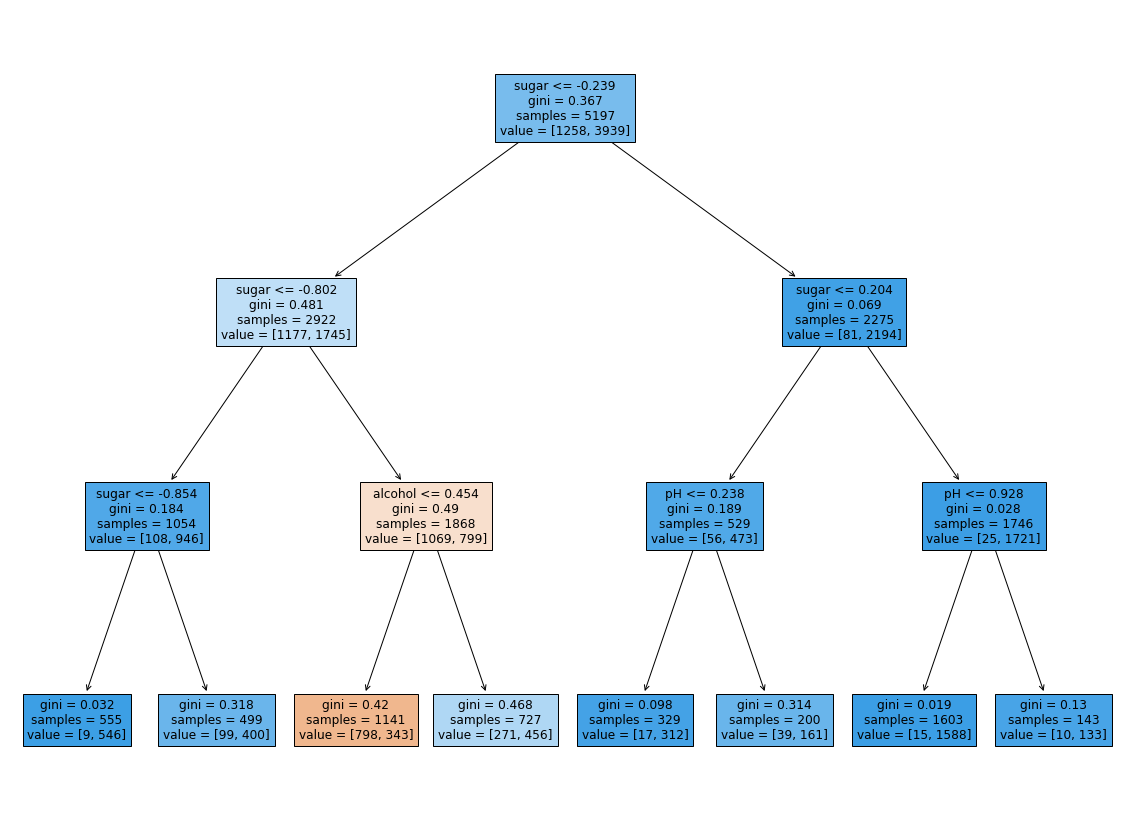

In [26]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [29]:
dt=DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


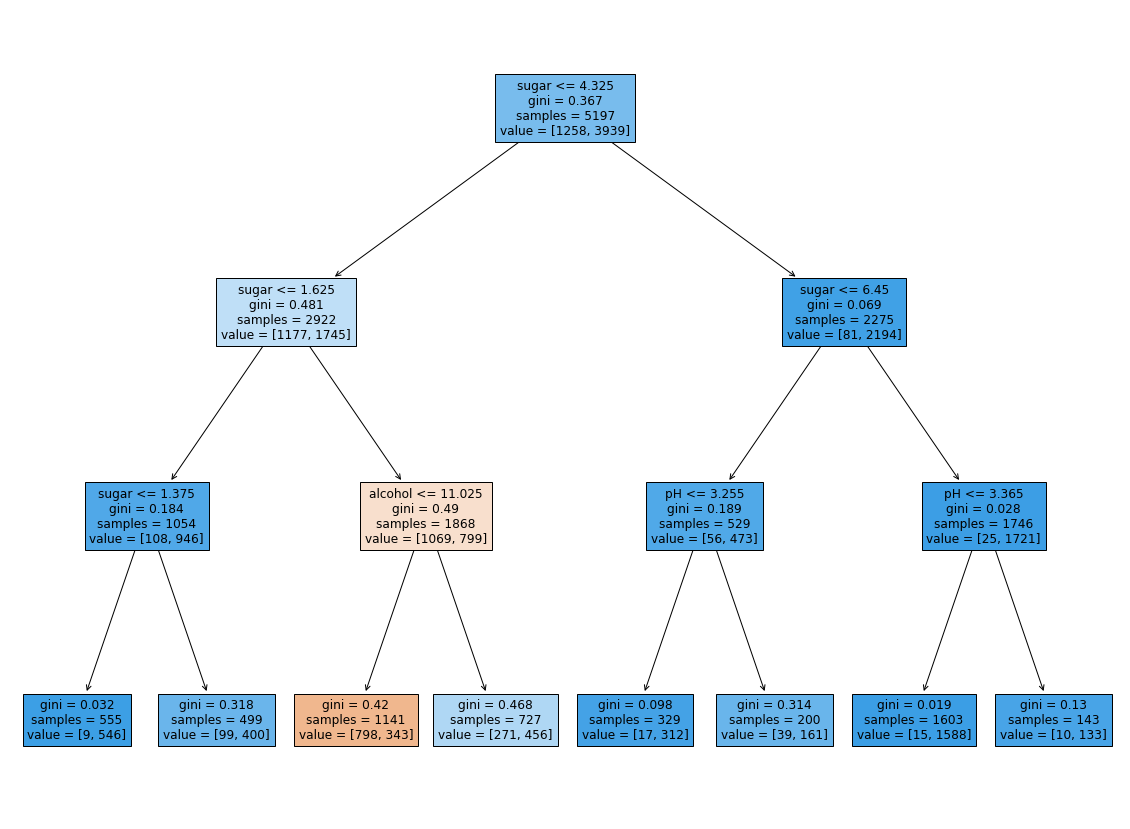

In [33]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [34]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


0.8874350586877044
0.8615384615384616


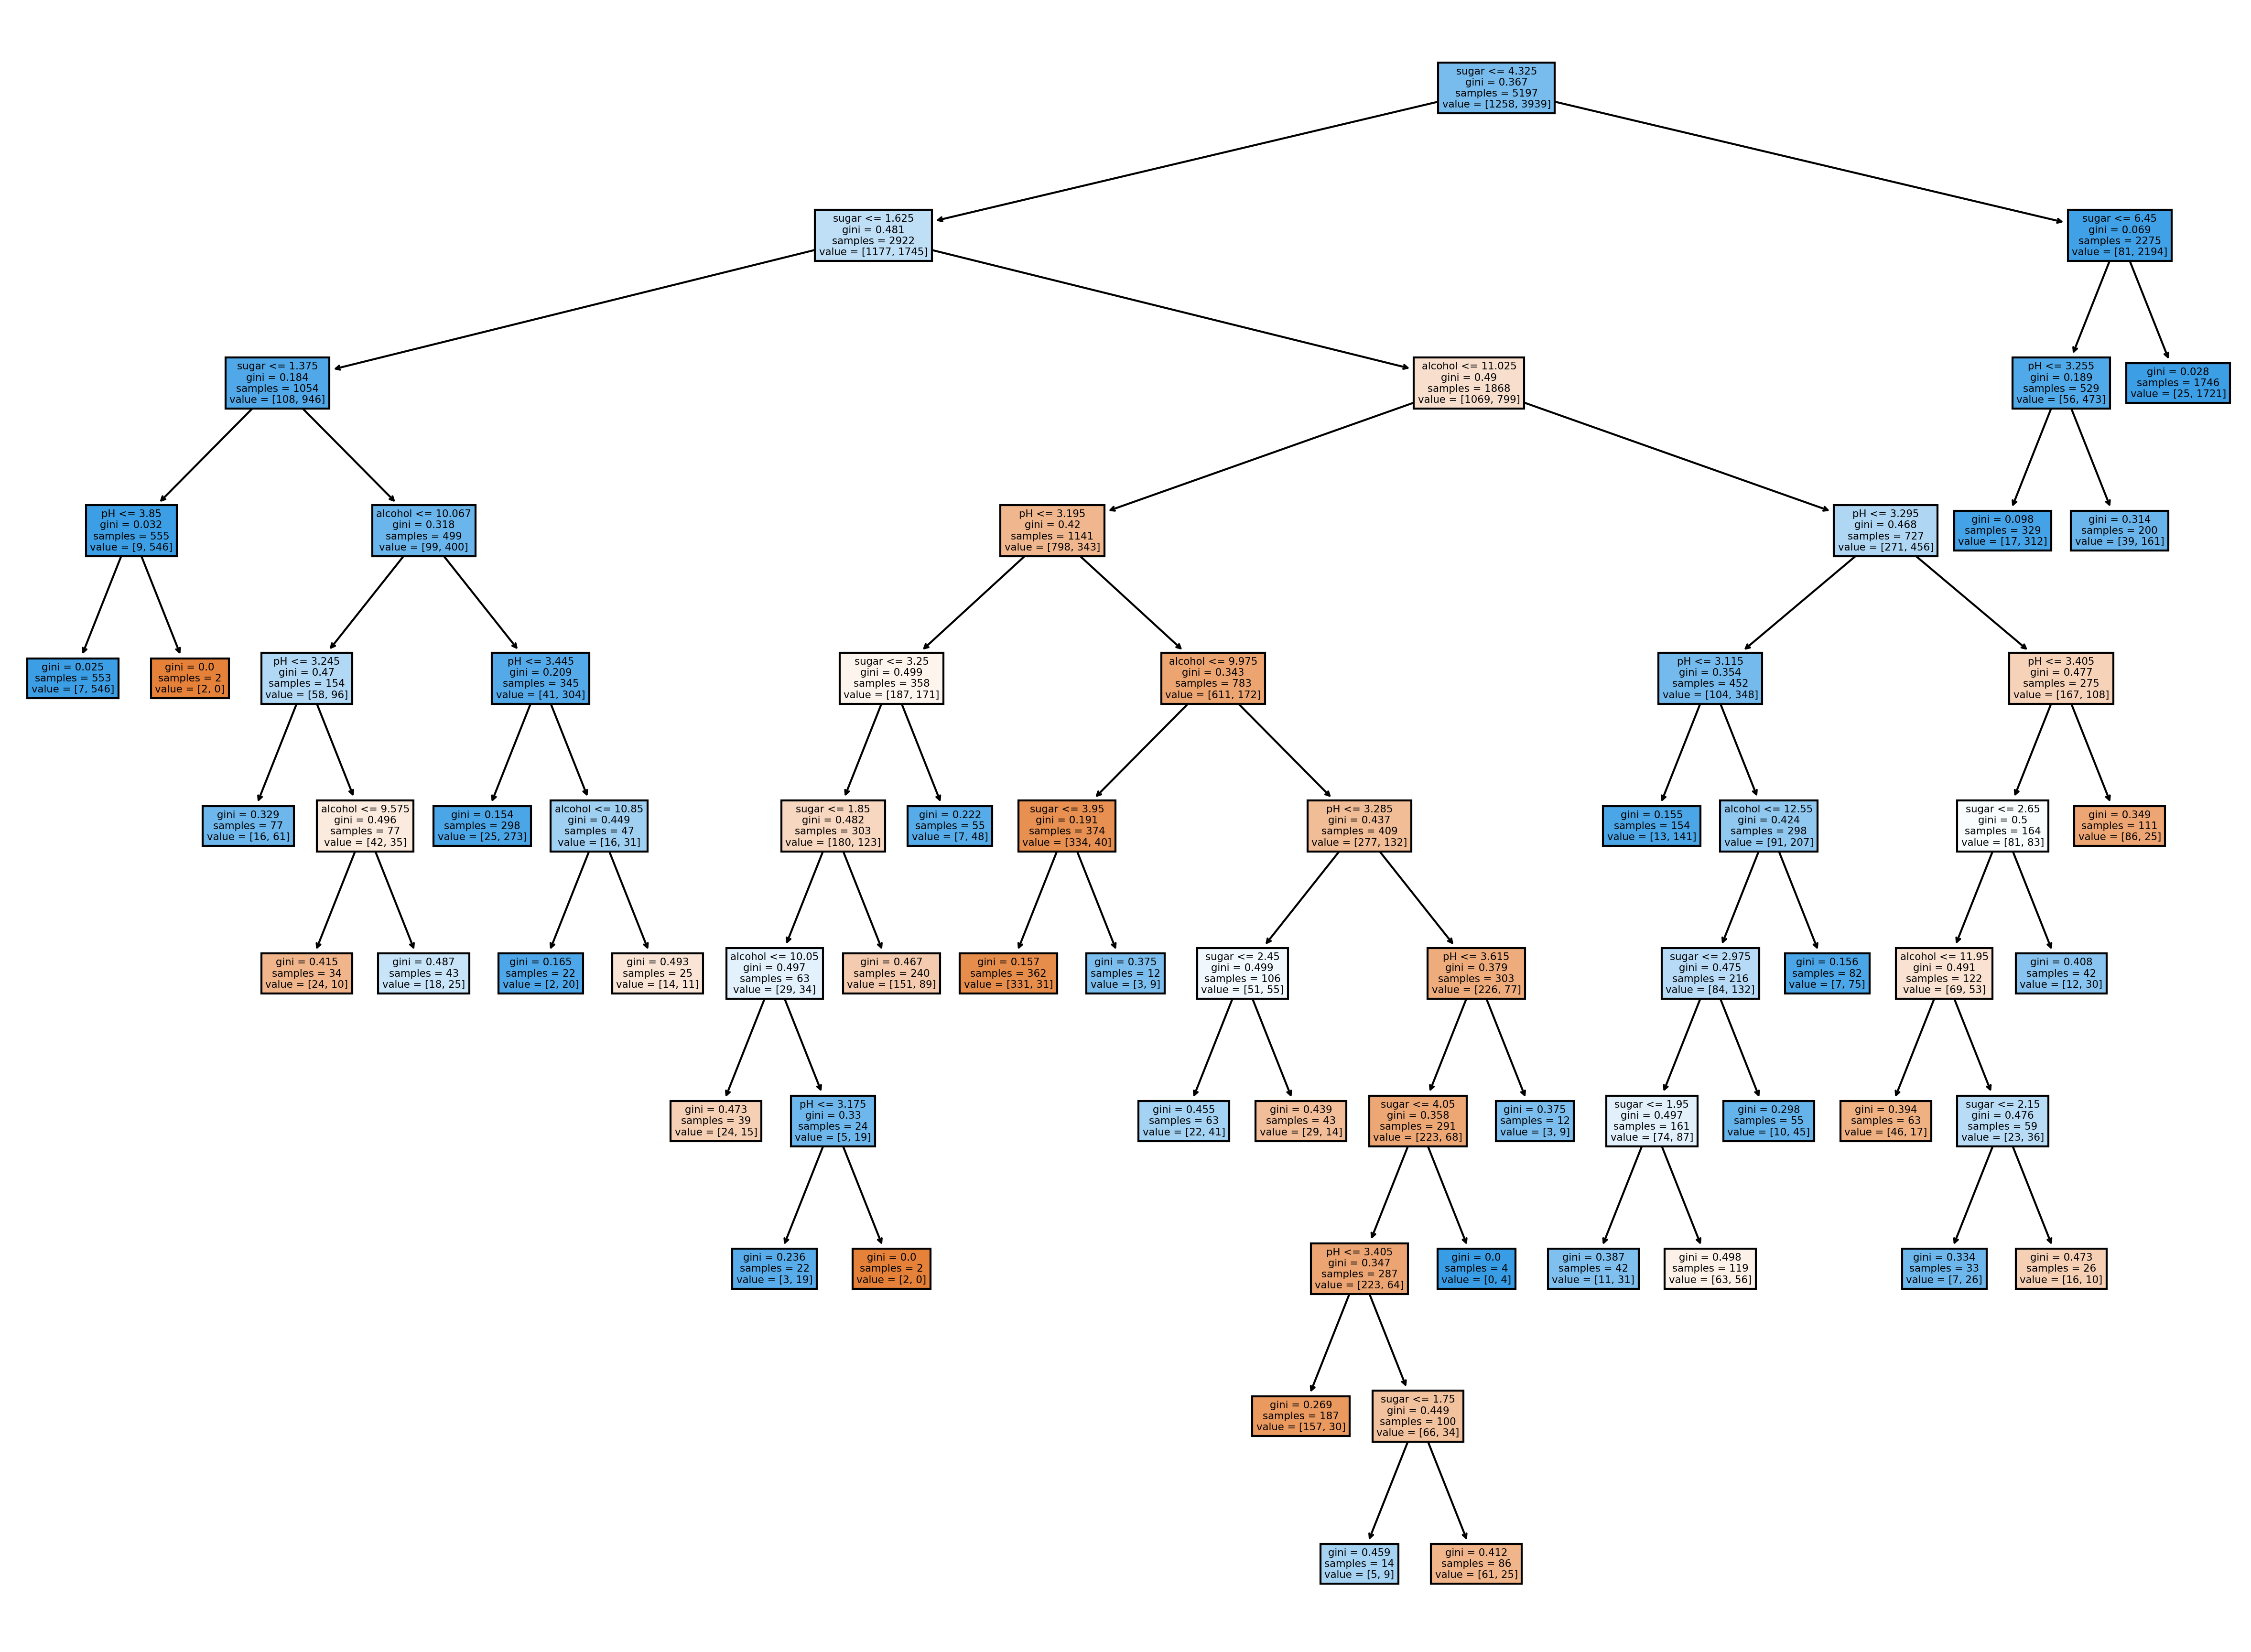

In [36]:
dt= DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
plt.figure(figsize=(20,15), dpi=300)
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [38]:
import pandas as pd
wine= pd.read_csv('https://bit.ly/wine_csv_data')

In [43]:
data=wine[['alcohol','sugar','pH']].to_numpy()
target=wine['class'].to_numpy()

In [44]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target= train_test_split(
    data, target, test_size=0.2, random_state=42)

In [45]:
sub_input, val_input, sub_target, val_target= train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [46]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [47]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


In [48]:
from sklearn.model_selection import cross_validate
scores= cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.02053332, 0.00768948, 0.00791597, 0.00800943, 0.00763512]), 'score_time': array([0.00130415, 0.00093508, 0.00111103, 0.00087953, 0.000916  ]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [49]:
import numpy as np
print(np.mean(scores['test_score']))

0.855300214703487


In [50]:
from sklearn.model_selection import StratifiedKFold
scores= cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [52]:
splitter= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores= cross_validate(dt, train_input, train_target, cv= splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


In [65]:
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [66]:
gs.fit(train_input, train_target)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
    

In [67]:
dt=gs.best_estimator_

In [68]:
print(dt.score(train_input, train_target))

0.9615162593804117


In [69]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [72]:
print(gs.cv_results_)

{'mean_fit_time': array([0.0103591 , 0.00983081, 0.00930514, 0.00805464, 0.00689144]), 'std_fit_time': array([0.00120773, 0.00197311, 0.0015599 , 0.00104216, 0.00040355]), 'mean_score_time': array([0.00105991, 0.00151029, 0.00110965, 0.00106297, 0.00081754]), 'std_score_time': array([6.40185806e-05, 7.08286371e-04, 2.33820172e-04, 1.32616172e-04,
       7.70616648e-05]), 'param_min_impurity_decrease': masked_array(data=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'min_impurity_decrease': 0.0001}, {'min_impurity_decrease': 0.0002}, {'min_impurity_decrease': 0.0003}, {'min_impurity_decrease': 0.0004}, {'min_impurity_decrease': 0.0005}], 'split0_test_score': array([0.86923077, 0.87115385, 0.86923077, 0.86923077, 0.86538462]), 'split1_test_score': array([0.86826923, 0.86346154, 0.85961538, 0.86346154, 0.86923077]), 'split2_test_score': array([0.8825794 , 0.87680462, 0.87584216,

In [73]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [74]:
print(gs.cv_results_['rank_test_score'])

[1 5 4 2 3]


In [77]:
best_index=np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [82]:
params={'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
        'max_depth': range(5, 20, 1),
        'min_samples_split': range(2, 100, 10)}

In [83]:
gs= GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'm

In [84]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [87]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


In [88]:
from scipy.stats import uniform , randint

In [89]:
rgen= randint(0, 10)
rgen.rvs(10)

array([6, 4, 6, 6, 4, 4, 1, 3, 6, 8])

In [92]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([107, 101,  93,  92, 101, 103,  94, 110,  99, 100]))

In [93]:
ugen= uniform(0,1)
ugen.rvs(10)

array([0.16483794, 0.29068428, 0.93454537, 0.62597595, 0.10487611,
       0.29831872, 0.26473078, 0.73948453, 0.60024027, 0.19111154])

In [95]:
params={'min_impurity_decrease': uniform(0.001, 0.01),
        'max_depth': randint(20, 50),
        'min_samples_split': randint(2, 25),
        'min_samples_leaf': randint(1,25)
        }

In [96]:
from sklearn.model_selection import RandomizedSearchCV
rs= RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)
rs.fit(train_input, train_target)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
         

In [97]:
print(rs.best_params_)

{'max_depth': 45, 'min_impurity_decrease': 0.001254191267440952, 'min_samples_leaf': 13, 'min_samples_split': 20}


In [99]:
print(np.max(rs.cv_results_['mean_test_score']))

0.8626136447767824


In [100]:
dt= rs.best_estimator_
print(dt.score(test_input, test_target))

0.8538461538461538


In [101]:
rs= RandomizedSearchCV(DecisionTreeClassifier(random_state=42, splitter='random'), params, n_iter=100, n_jobs=-1, random_state=42)
rs.fit(train_input, train_target)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
         

In [102]:
print(rs.best_params_)

{'max_depth': 36, 'min_impurity_decrease': 0.0013734818874921442, 'min_samples_leaf': 6, 'min_samples_split': 16}


In [103]:
print(np.max(rs.cv_results_['mean_test_score']))

0.8137325090693714


In [104]:
dt= rs.best_estimator_
print(dt.score(test_input, test_target))

0.8138461538461539


In [105]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wine=pd.read_csv('https://bit.ly/wine_csv_data')
data=wine[['alcohol', 'sugar','pH']].to_numpy()
target=wine['class'].to_numpy()
train_input, test_input, train_target, test_targe= train_test_split(
    data, target, test_size=0.2, random_state=42
)

In [106]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_jobs=1, random_state=42)

In [107]:
scores= cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [108]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [109]:
rf= RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


In [110]:
from sklearn.ensemble import ExtraTreesClassifier
et=ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores= cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [111]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


In [113]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=42)
scores= cross_validate(gb, train_input, train_target,
                       return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [116]:
gb= GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores= cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [117]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


In [118]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb=HistGradientBoostingClassifier(random_state=42)
scores=cross_validate(hgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [120]:
from sklearn.inspection import permutation_importance
hgb.fit(train_input, train_target)
result= permutation_importance(hgb,train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)
# 특성중요도/ 평균/ 표준편차

[0.08876275 0.23438522 0.08027708]


In [121]:
result=permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [122]:
hgb.score(test_input, test_target)

0.8723076923076923

In [123]:
from xgboost import XGBClassifier
xgb= XGBClassifier(tree_method='hist', random_state=42)
scores=cross_validate(xgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8824322471423747 0.8726214185237284


In [126]:
from lightgbm import LGBMClassifier
lgb= LGBMClassifier(random_state=42)
scores=cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9338079582727165 0.8789710890649293


In [129]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2021-11-08 12:49:44--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-11-08 12:49:44--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-11-08 12:49:45--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conne

In [130]:
import numpy as np
import matplotlib.pyplot as plt
fruits=np.load('fruits_300.npy')

In [131]:
print(fruits.shape)

(300, 100, 100)


In [132]:
fruits[:5]

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
   

In [133]:
print(fruits[0,0,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


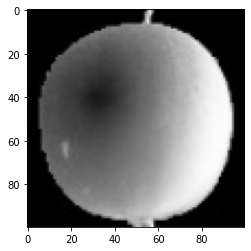

In [135]:
plt.imshow(fruits[0],cmap='gray')
plt.show()

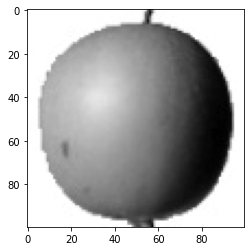

In [138]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

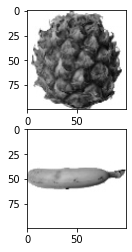

In [155]:
fig, axs= plt.subplots(2,1)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

In [142]:
apple=fruits[:100].reshape(-1, 100*100)
pineapple=fruits[100:200].reshape(-1,100*100)
banana=fruits[200:300].reshape(-1, 100*100)

In [143]:
print(apple.shape)

(100, 10000)


In [144]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


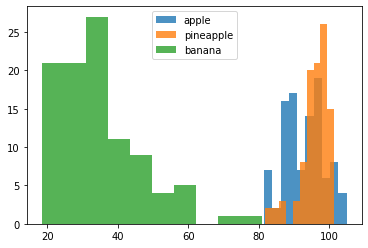

In [147]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple','pineapple','banana'])
plt.show()

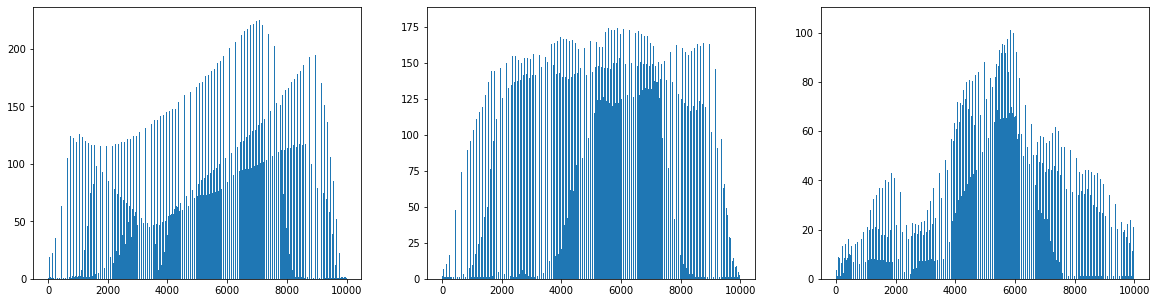

In [148]:
fig, axs=plt.subplots(1,3, figsize=(20,5))
axs[0].bar(range(10000),np.mean(apple,axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

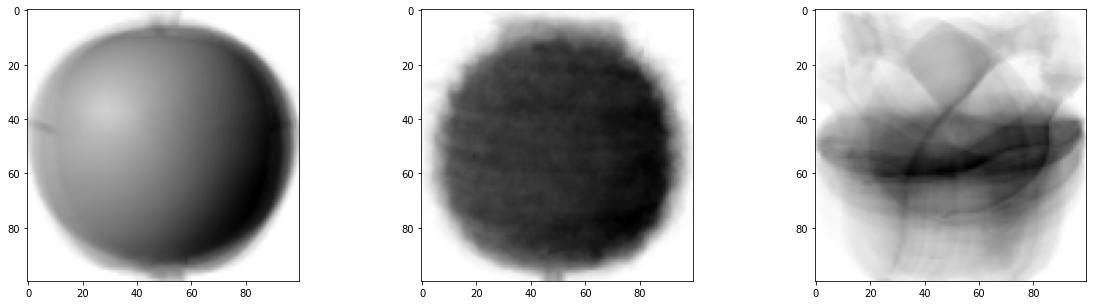

In [158]:
apple_mean=np.mean(apple, axis=0).reshape(100,100)
pineapple_mean=np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean= np.mean(banana, axis=0).reshape(100,100)
fig,axs=plt.subplots(1,3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean,cmap='gray_r')
plt.show()

In [159]:
abs_diff= np.abs(fruits- apple_mean)
abs_mean= np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


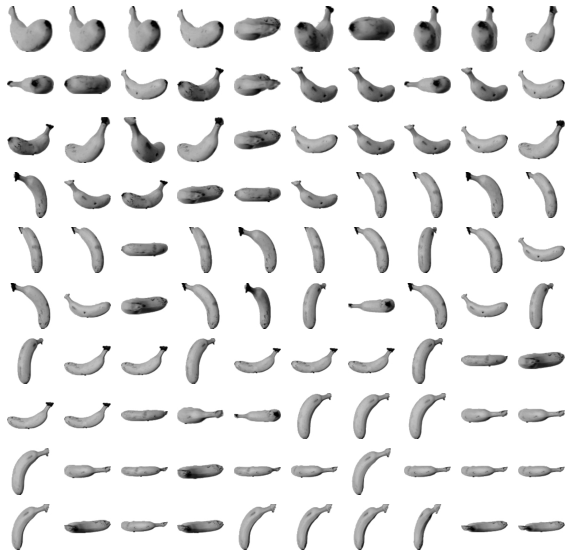

In [161]:
apple_index= np.argsort(abs_mean)[200:]
fig, axs= plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[apple_index[i*10+j]],cmap='gray_r')
    axs[i,j].axis('off')
plt.show()

In [162]:
pineapple=fruits[100:200].reshape(-1,100*100)
pineapple_mean=np.mean(pineapple, axis=0).reshape(100,100)
abs_diff=np.abs(fruits-pineapple_mean)
abs_mean=np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


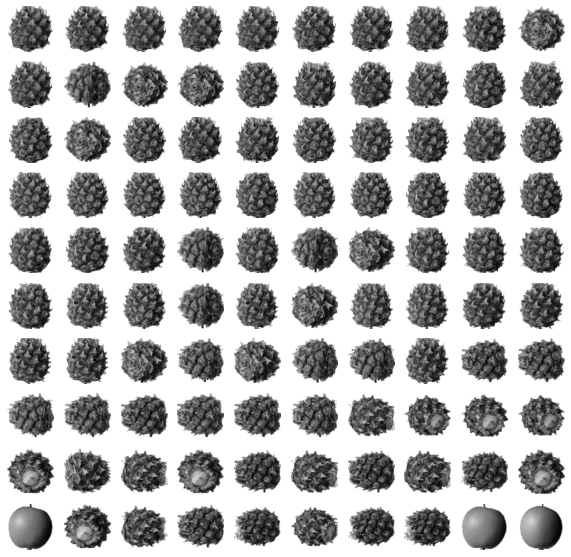

In [164]:
pineapple_index=np.argsort(abs_mean)[:]
fig, axs = plt.subplots(10,10, figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[pineapple_index[i*10+j]], cmap='gray_r')
    axs[i,j].axis('off')
plt.show()

In [167]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d= fruits.reshape(-1, 100*100)

In [168]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3 , random_state=42)
km.fit(fruits_2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [169]:
print(km.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [170]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


In [178]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n= len(arr)
  rows=int(np.ceil(n/10))
  cols= n if rows< 2 else 10
  fig, axs= plt. subplots(rows, cols, figsize=(cols*ratio, rows*ratio),squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10+j <n :
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r') 
      axs[i,j].axis('off')
  plt.show()

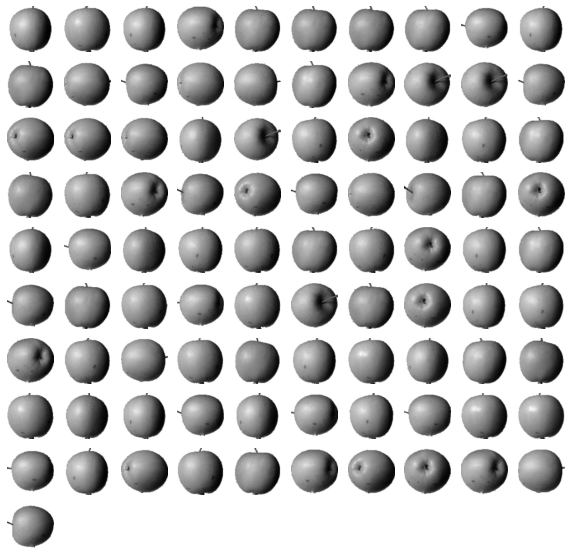

In [179]:
draw_fruits(fruits[km.labels_==0])

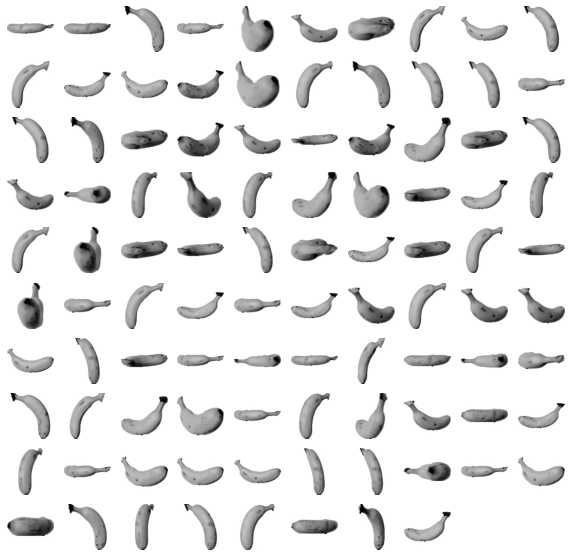

In [180]:
draw_fruits(fruits[km.labels_==1])

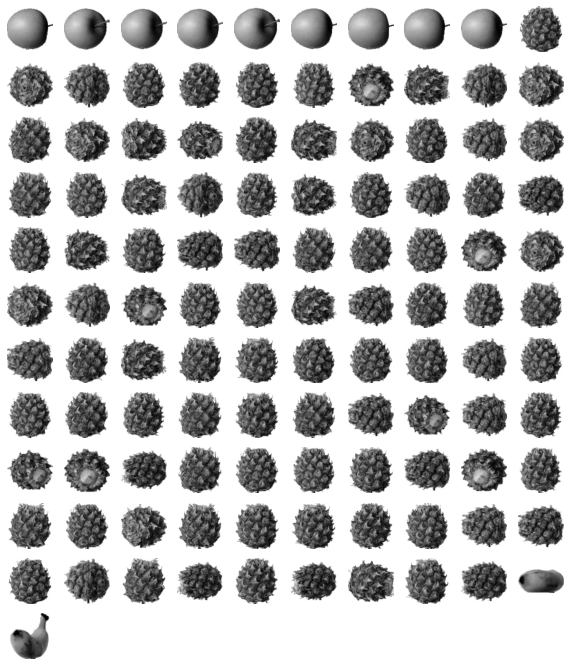

In [182]:
draw_fruits(fruits[km.labels_==2])

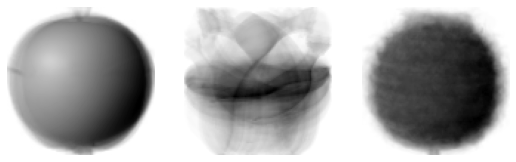

In [183]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [184]:
print(km.transform(fruits_2d[100:101]))

[[5267.70439881 8837.37750892 3393.8136117 ]]


In [186]:
print(km.predict(fruits_2d[100:101]))

[2]


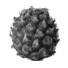

In [187]:
draw_fruits(fruits[100:101])

In [189]:
print(km.n_iter_)

3


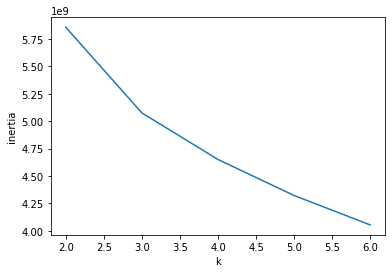

In [190]:
inertia=[]
for k in range(2,7):
  km=KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2,7),inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()